<a href="https://colab.research.google.com/github/Berubell9/Bellweb/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimating the Value of Pi
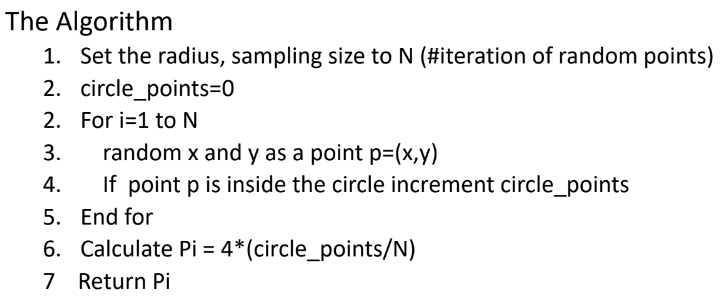

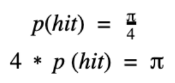

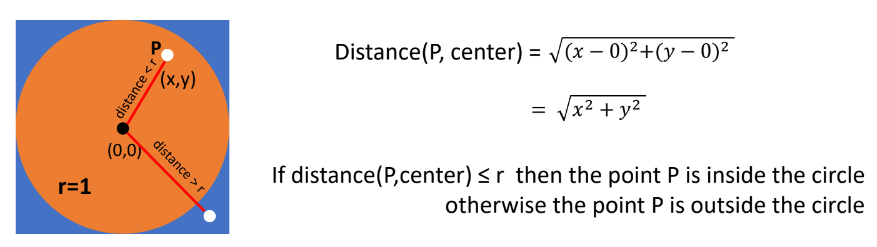



In [43]:
import random
import math
import pandas as pd

In [44]:
# radius
r = 1.0 
# จำนวนรอบตั้งเเต่ 1-1001
N = 1001 
d = {"Trials":[],"Pi":[]}

In [45]:
for T in range(1,N):
  circle_p = 0
  for i in range(T):
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)

    x2 = x ** 2
    y2 = y ** 2

    if math.sqrt(x2 + y2) <= r:
      circle_p+=1

  d["Trials"].append(T)
  d["Pi"].append((circle_p/T)*4)

### กราฟจุด
* Library คือ matplotlib `import matplotlib.pyplot as plt` ใช้สำหรับเเสดงกราฟ

* Library คือ seaborn `import seaborn as sns` ใช้ร่วมกับ matplotlib เพื่อตกเเต่งกราฟิกของกราฟทางสถิติให้น่าสนใจ และเเสดงข้อมูล
* `sns.scatterplot()` = กราฟจุด

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

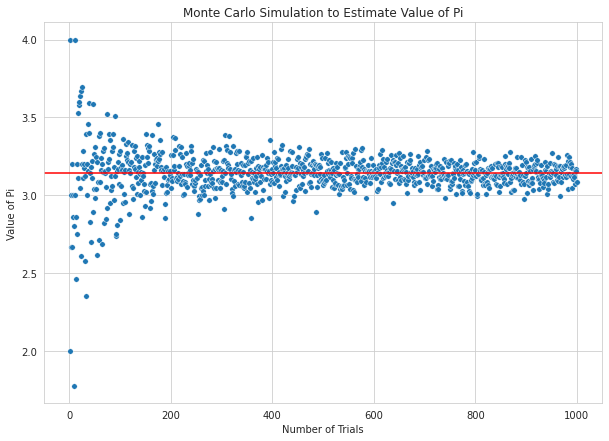

In [47]:
df = pd.DataFrame(data = d)
# ขนาดจตุรัส 10*7
plt.figure(figsize = (10,7))
# กราฟจุด
plot = sns.scatterplot(x="Trials", y="Pi", s=30, marker="o", data=df)
# กำหนดหัวข้อ
plot.set(title='Monte Carlo Simulation to Estimate Value of Pi', 
         xlabel="Number of Trials", 
         ylabel="Value of Pi")
# กำหนดเเกนสีเเดงให้เเสดงอยู่ที่ 3.14
plt.axhline(y = 3.14, color='r', linestyle='-')
# ปิดการโชว์ library
plt.show()

In [48]:
df

,Trials,Pi
0,1,4.000000
1,2,2.000000
2,3,2.666667
3,4,3.000000
4,5,3.200000
...,...,...
995,996,3.164659
996,997,3.073220
997,998,3.166333
998,999,3.155155


### Histogram

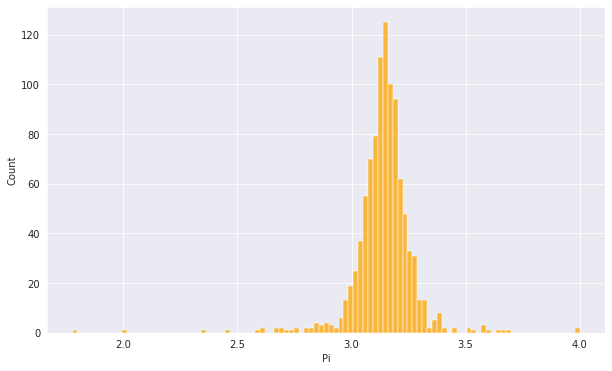

In [49]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,6))
sns.histplot(df, x="Pi",color='orange');

In [51]:
# ค่า Pie ที่ได้จะใกล้เคียง 3.14
df['Pi'].mean()

3.141379480162017

# Predicting Sales Commission Budget

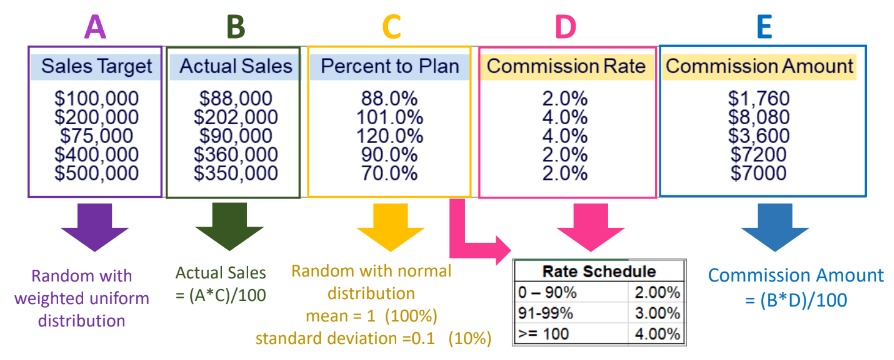

### 1. สุ่ม **Percent to Plan** (normal distribution) 
จาก ค่าเฉลี่ย(mean/avg) = 1, ส่วนเบี่ยงเบนมาตรฐาน(std) = 0.1, จำนวนพนักงาน
* `np.random.normal()` = สุ่มเเบบระฆังคว่ำ
* `.round(2)` = ปัดเป็นทศนิยม 2 ตำเเหน่ง

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
# ค่าเฉลี่ย(mean/avg) = 1
avg = 1
# ส่วนเบี่ยงเบนมาตรฐาน(std) = 0.1
std_dev = 0.1
# จำนวนพนักงาน
num_reps = 500
# สุ่มเเบบระฆังคว่ำ
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

### 2. สุ่ม **Sale Target** (weighted uniform distribution)
ตั้งเป้าหมายตามความน่าจะเป็น
* `np.random.choice()` = สุ่มเเบบมีความน่าจะเป็น

In [54]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
# สุ่มเเบบมีความน่าจะเป็น
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [55]:
# เอาข้อมูลใส่ Data frame
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,'Sales_Target': sales_target})
df

,Pct_To_Target,Sales_Target
0,0.90,75000
1,1.11,75000
2,0.85,75000
3,1.02,500000
4,0.94,100000
...,...,...
495,1.05,500000
496,0.96,75000
497,1.17,200000
498,0.99,400000


### 3. คำนวณค่า **Actual Sale**
สูตร : `Sale Target * Percent to Plan / 100`

In [56]:
df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

### 4. คำนวณ Commission Rate
* `คอลัม.apple(Function)` = เอาข้อมูลเเต่ละตัวในคอลัมมาใส่ใน Function

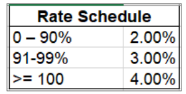

In [57]:
def calc_commission_rate(x):
  if x <= .90:
    return .02
  if x <= .99:
    return .03
  else:
    return .04

In [58]:
# เอาข้อมูลเเต่ลำตัวในคอลัมมาใส่ใน calc_commission_rate()
df['Commission_Rate'] = df['Pct_To_Target'].apply(calc_commission_rate)

### 5. คำนวณค่า Commission ทั้งหมด
สูตร : `Commission Rate * Actual Sale`

In [59]:
df['Commission_Amount'] = df['Commission_Rate'] * df['Sales']

# Table
* Library คือ tabulate `from tabulate import tabulate`

In [60]:
from tabulate import tabulate

In [61]:
df.describe().style.format('{:,.2f}')

,Pct_To_Target,Sales_Target,Sales,Commission_Rate,Commission_Amount
count,500.00,500.00,500.00,500.00,500.00
mean,1.00,"172,700.00","174,363.00",0.03,"6,080.49"
std,0.10,"124,511.91","129,887.67",0.01,"5,082.34"
min,0.69,"75,000.00","52,500.00",0.02,"1,050.00"
25%,0.93,"75,000.00","82,500.00",0.03,"2,880.00"
50%,1.00,"100,000.00","105,000.00",0.04,"4,080.00"
75%,1.07,"200,000.00","210,500.00",0.04,"8,320.00"
max,1.26,"500,000.00","620,000.00",0.04,"24,800.00"


In [62]:
# psql = เส้นประ
print((tabulate(df.describe() , headers='keys' , floatfmt=",.2f" , tablefmt='psql')))

+-------+-----------------+----------------+------------+-------------------+---------------------+
|       |   Pct_To_Target |   Sales_Target |      Sales |   Commission_Rate |   Commission_Amount |
|-------+-----------------+----------------+------------+-------------------+---------------------|
| count |          500.00 |         500.00 |     500.00 |            500.00 |              500.00 |
| mean  |            1.00 |     172,700.00 | 174,363.00 |              0.03 |            6,080.49 |
| std   |            0.10 |     124,511.91 | 129,887.67 |              0.01 |            5,082.34 |
| min   |            0.69 |      75,000.00 |  52,500.00 |              0.02 |            1,050.00 |
| 25%   |            0.93 |      75,000.00 |  82,500.00 |              0.03 |            2,880.00 |
| 50%   |            1.00 |     100,000.00 | 105,000.00 |              0.04 |            4,080.00 |
| 75%   |            1.07 |     200,000.00 | 210,500.00 |              0.04 |            8,320.00 |


In [63]:
# grid = ตารางกริต
print((tabulate(df.describe() , headers='keys' , floatfmt=",.2f" , tablefmt="grid")))

+-------+-----------------+----------------+------------+-------------------+---------------------+
|       |   Pct_To_Target |   Sales_Target |      Sales |   Commission_Rate |   Commission_Amount |
+=======+=================+================+============+===================+=====================+
| count |          500.00 |         500.00 |     500.00 |            500.00 |              500.00 |
+-------+-----------------+----------------+------------+-------------------+---------------------+
| mean  |            1.00 |     172,700.00 | 174,363.00 |              0.03 |            6,080.49 |
+-------+-----------------+----------------+------------+-------------------+---------------------+
| std   |            0.10 |     124,511.91 | 129,887.67 |              0.01 |            5,082.34 |
+-------+-----------------+----------------+------------+-------------------+---------------------+
| min   |            0.69 |      75,000.00 |  52,500.00 |              0.02 |            1,050.00 |


In [64]:
# fancy_grid = เส้น
print((tabulate(df.describe() , headers='keys' , floatfmt=",.2f" , tablefmt="fancy_grid")))

╒═══════╤═════════════════╤════════════════╤════════════╤═══════════════════╤═════════════════════╕
│       │   Pct_To_Target │   Sales_Target │      Sales │   Commission_Rate │   Commission_Amount │
╞═══════╪═════════════════╪════════════════╪════════════╪═══════════════════╪═════════════════════╡
│ count │          500.00 │         500.00 │     500.00 │            500.00 │              500.00 │
├───────┼─────────────────┼────────────────┼────────────┼───────────────────┼─────────────────────┤
│ mean  │            1.00 │     172,700.00 │ 174,363.00 │              0.03 │            6,080.49 │
├───────┼─────────────────┼────────────────┼────────────┼───────────────────┼─────────────────────┤
│ std   │            0.10 │     124,511.91 │ 129,887.67 │              0.01 │            5,082.34 │
├───────┼─────────────────┼────────────────┼────────────┼───────────────────┼─────────────────────┤
│ min   │            0.69 │      75,000.00 │  52,500.00 │              0.02 │            1,050.00 │
